In [9]:
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import random
import glob
import shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall(".")

# organize our data  

In [ ]:
os.chdir('./catvsdog/')

In [ ]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    for c in random.sample(glob.glob('dataset/cat*'),500):
        shutil.move(c,'train/cat/')
    for c in random.sample(glob.glob('dataset/dog*'),500):
        shutil.move(c,'train/dog/')
    for c in random.sample(glob.glob('dataset/cat*'),100):
        shutil.move(c,'valid/cat/')
    for c in random.sample(glob.glob('dataset/dog*'),100):
        shutil.move(c,'valid/dog/')
    for c in random.sample(glob.glob('dataset/cat*'),50):
        shutil.move(c,'test/cat/')
    for c in random.sample(glob.glob('dataset/dog*'),50):
        shutil.move(c,'test/dog/')


In [ ]:
os.getcwd()

'e:\\DATA COURCE UNV\\یادگیری عمیق\\en'

In [ ]:
os.chdir('../')

In [12]:
train_path='./catvsdog/train'
test_path='./catvsdog/test'
valid_path='./catvsdog/valid'

In [13]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).\
flow_from_directory(train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
valid_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).\
flow_from_directory(valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10 )
test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).\
flow_from_directory(test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)


# shuffle has to be False because of confution matrix
# target size resize all image to that
# preprocessing_function=tf.keras.applications.vgg16.preprocess_input > 
# preprocces data


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:
assert train_batch.n==1000 #test if it has a right number

In [15]:
from IPython.display import display
from PIL import Image

In [16]:
import PIL.Image
imgs,label=next(train_batch)

In [17]:
def plot(images_arr):
    fig,axes=plt.subplots(nrows=1,ncols=10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

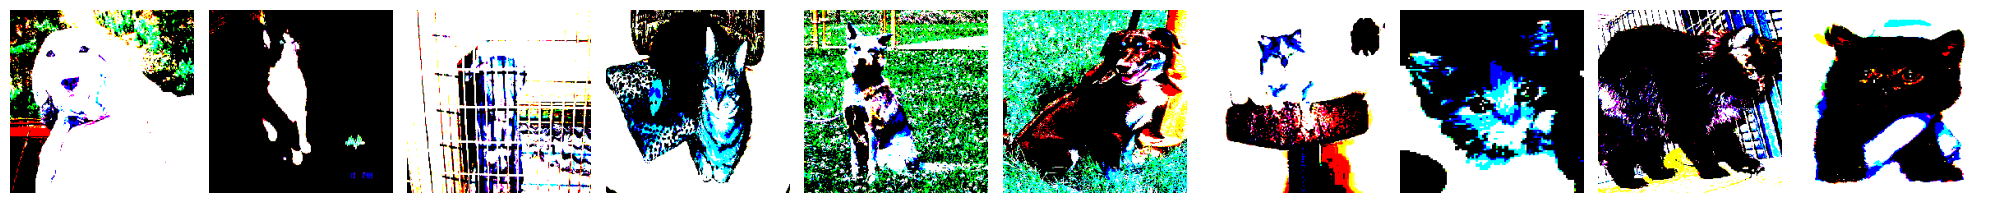

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
plot(imgs)
print(label)

In [19]:
modelvgg=tf.keras.applications.vgg16.VGG16()


In [20]:
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model = tf.keras.Sequential()
for layer in modelvgg.layers[:-1]:
    model.add(layer)

In [22]:
for layer in model. layers:
     layer. trainable = False

In [23]:
# model.add(tf.keras.layers.Flatten(name='flt2'))
model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [29]:
model.fit(x=train_batch,validation_data=valid_batch,epochs=5,verbose=2)

Epoch 1/5
100/100 - 115s - loss: 0.1119 - accuracy: 0.9650 - val_loss: 0.0593 - val_accuracy: 0.9750 - 115s/epoch - 1s/step
Epoch 2/5
100/100 - 110s - loss: 0.0329 - accuracy: 0.9860 - val_loss: 0.1341 - val_accuracy: 0.9450 - 110s/epoch - 1s/step
Epoch 3/5
100/100 - 119s - loss: 0.0073 - accuracy: 0.9960 - val_loss: 0.0573 - val_accuracy: 0.9800 - 119s/epoch - 1s/step
Epoch 4/5
100/100 - 124s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9850 - 124s/epoch - 1s/step
Epoch 5/5
100/100 - 109s - loss: 4.4208e-04 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9850 - 109s/epoch - 1s/step


In [98]:
model.save('catvgg16.h5')

In [30]:
test_img,test_label=next(test_batch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

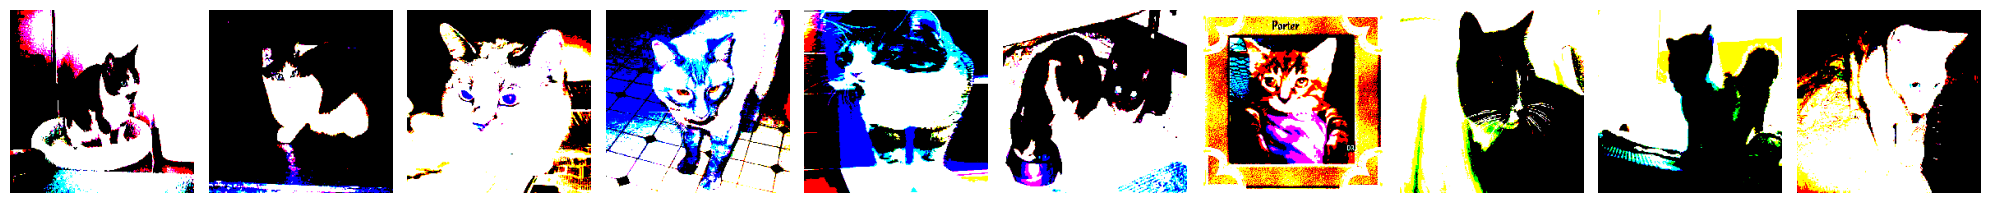

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [31]:
plot(test_img)
print(test_label)

In [32]:
perdiction=model.predict(test_batch,verbose=2)

10/10 - 9s - 9s/epoch - 910ms/step


In [33]:
perdiction

array([[9.99999285e-01, 6.97492339e-07],
       [1.00000000e+00, 2.10203057e-13],
       [1.00000000e+00, 7.95483057e-09],
       [1.00000000e+00, 2.41987497e-09],
       [1.00000000e+00, 6.99747704e-10],
       [9.99792397e-01, 2.07676479e-04],
       [1.00000000e+00, 1.93575954e-11],
       [1.00000000e+00, 2.38097891e-15],
       [9.99760091e-01, 2.39913221e-04],
       [1.00000000e+00, 8.21738411e-09],
       [9.99993682e-01, 6.29738770e-06],
       [1.00000000e+00, 4.14856167e-08],
       [1.00000000e+00, 2.93403057e-09],
       [1.00000000e+00, 5.43317498e-08],
       [1.00000000e+00, 1.75085493e-08],
       [9.99995828e-01, 4.12835334e-06],
       [1.00000000e+00, 1.65861125e-09],
       [9.99990106e-01, 9.86401392e-06],
       [1.00000000e+00, 3.30274332e-08],
       [1.00000000e+00, 1.13717577e-11],
       [6.44043446e-01, 3.55956554e-01],
       [1.00000000e+00, 4.64076520e-12],
       [1.00000000e+00, 4.54082778e-11],
       [1.00000000e+00, 3.59442948e-10],
       [1.000000

In [34]:
np.round(perdiction)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [35]:
cm=confusion_matrix(test_batch.classes,np.argmax(perdiction,1))

In [36]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    complite : https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [37]:
test_batch.class_indices # tell us with is correct order

{'cat': 0, 'dog': 1}

[[50  0]
 [ 0 50]]


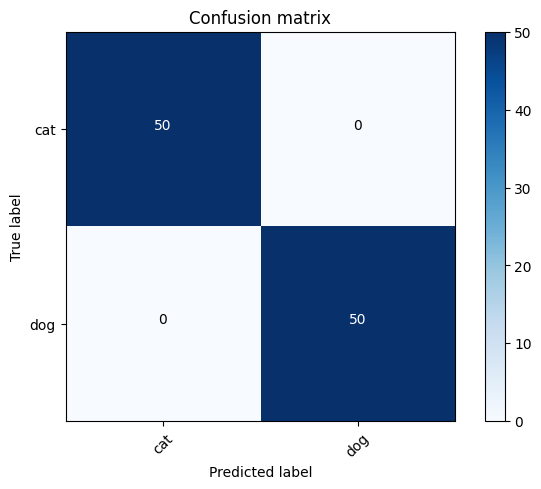

In [38]:
plot_confusion_matrix(cm,['cat','dog'])

In [41]:
def _get_features(img_path):
    return  np.round(model.predict(np.expand_dims(tf.keras.applications.vgg16.preprocess_input(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)))), axis=0)))


In [42]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

In [54]:
_get_features("test1/5.jpg")

1/1 [==============================] - 3s 3s/step


array([[1., 0.]], dtype=float32)

In [48]:
a=[]
count=1
import warnings
warnings.filterwarnings('ignore')
for i in range (12500):
    a.append(_get_features("test1/{}.jpg".format(i + 1)).tolist()[0])
    print(count)
    count+=1

1/1 [==============================] - 0s 158ms/step
2
1/1 [==============================] - 0s 148ms/step
3
1/1 [==============================] - 0s 138ms/step
4
1/1 [==============================] - 0s 148ms/step
5
1/1 [==============================] - 0s 152ms/step
6
1/1 [==============================] - 0s 138ms/step
7
1/1 [==============================] - 0s 146ms/step
8
1/1 [==============================] - 0s 162ms/step
9
1/1 [==============================] - 0s 163ms/step
10
1/1 [==============================] - 0s 148ms/step
11
1/1 [==============================] - 0s 142ms/step
12
1/1 [==============================] - 0s 154ms/step
13
1/1 [==============================] - 0s 154ms/step
14
1/1 [==============================] - 0s 159ms/step
15
1/1 [==============================] - 0s 143ms/step
16
1/1 [==============================] - 0s 147ms/step
17
1/1 [==============================] - 0s 143ms/step
18
1/1 [==============================] - 0s 145ms/step
19


In [50]:
import pandas as pd
a[0]

[0.0, 1.0]

In [51]:
b=[]
for item in a:
    if item[0]==1.:
        b.append(0)
    else:
        b.append(1)

In [58]:
df=pd.DataFrame(b).reset_index()
df

,index,0
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
12495,12495,0
12496,12496,0
12497,12497,1
12498,12498,1


In [60]:
df['index']=df['index']+1

In [63]:
df.rename(columns={0:'label','index':'id'},inplace=True)

In [65]:
df.to_csv('sub.csv',index=False)